<a href="https://colab.research.google.com/github/artaasadi/NeuralNetwork_proj/blob/main/AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import pickle
import random
import matplotlib.pyplot as plt

# Loading Data
after importing packages the needed data are gotten from google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd drive/'My Drive'/'Colab Notebooks'/AI_Project_Files

/content/drive/My Drive/Colab Notebooks/AI_Project_Files


getting data from pkl file and reshaping them to 102
then shuffling them

In [4]:
# loading training set features
f = open("Datasets/train_set_features.pkl", "rb")
train_set_features2 = pickle.load(f)
f.close()

# reducing feature vector length 
features_STDs = np.std(a=train_set_features2, axis=0)
train_set_features = train_set_features2[:, features_STDs > 52.3]

# changing the range of data between 0 and 1
train_set_features = np.divide(train_set_features, train_set_features.max())

# loading training set labels
f = open("Datasets/train_set_labels.pkl", "rb")
train_set_labels = pickle.load(f)
f.close()

# ------------
# loading test set features
f = open("Datasets/test_set_features.pkl", "rb")
test_set_features2 = pickle.load(f)
f.close()

# reducing feature vector length 
features_STDs = np.std(a=test_set_features2, axis=0)
test_set_features = test_set_features2[:, features_STDs > 48]

# changing the range of data between 0 and 1
test_set_features = np.divide(test_set_features, test_set_features.max())

# loading test set labels
f = open("Datasets/test_set_labels.pkl", "rb")
test_set_labels = pickle.load(f)
f.close()

# ------------
# preparing our training and test sets - joining datasets and lables
train_set = []
test_set = []

for i in range(len(train_set_features)):
    label = np.array([0,0,0,0])
    label[int(train_set_labels[i])] = 1
    label = label.reshape(4,1)
    train_set.append((train_set_features[i].reshape(102,1), label))
    

for i in range(len(test_set_features)):
    label = np.array([0,0,0,0])
    label[int(test_set_labels[i])] = 1
    label = label.reshape(4,1)
    test_set.append((test_set_features[i].reshape(102,1), label))

# shuffle
random.shuffle(train_set)
random.shuffle(test_set)

# print size
print(len(train_set)) #1962
print(len(test_set)) #662

1962
662


defining weights by normal distribution and defining biases by zero

In [5]:
W1 = np.random.normal(0, 1.0, [150, 102])
W2 = np.random.normal(0, 1.0, [60, 150])
W3 = np.random.normal(0, 1.0, [4, 60])
b1 = np.zeros([150,1])
b2 = np.zeros([60,1])
b3 = np.zeros([4,1])

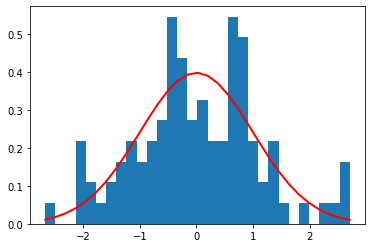

In [37]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(W1[0], 30, density=True)
plt.plot(bins, 1/(np.sqrt(2 * np.pi)) *
               np.exp( - (bins)**2 / 2 ),
         linewidth=2, color='r')
plt.show()

changed lists to np array to work easier

In [7]:
train_set200 = np.array(random.sample(train_set, 200))
test_set200 = np.array(random.sample(test_set, 200))
train_set = np.array(train_set)
test_set = np.array(test_set)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify '

# FeedForward
while the weights are settled by normal distribution and we have 4 labels the accuracy is usualy near to 0.25

In [8]:
def sigmoid(x) :
  return 1/(1 + np.exp(-x))

counter = 0
for sample in train_set200 :
  a1 = sigmoid(W1 @ sample[0] + b1)
  a2 = sigmoid(W2 @ a1 + b2)
  a3 = sigmoid(W3 @ a2 + b3)
  if (np.argmax(a3) == np.argmax(sample[1])) :
    counter += 1
accuracy = (counter/200)
print(accuracy)

0.175


# BackPropagation


In [9]:
def sigmoid(x) :
  return 1/(1 + np.exp(-x))

learning_rate = 1
epochs_num = 20
batch_size = 10
cost_list = []
accuracy_list = []
for epoch in range(0, epochs_num) :
  np.random.shuffle(train_set200)
  batches = np.array_split(train_set200, 200//batch_size)
  cost = 0
  accuracy = 0
  for batch in batches :
    W1_grad = np.zeros([150, 102])
    W2_grad = np.zeros([60, 150])
    W3_grad = np.zeros([4, 60])
    b1_grad = np.zeros([150, 1])
    b2_grad = np.zeros([60, 1])
    b3_grad = np.zeros([4, 1])
    for sample, label in batch :
      a1 = sigmoid(W1 @ sample + b1)
      a2 = sigmoid(W2 @ a1 + b2)
      a3 = sigmoid(W3 @ a2 + b3)
      cost += np.sum(np.power((a3-label),2))
      if (np.argmax(a3) == np.argmax(label)) :
        accuracy += 1


      for j in range(W3_grad.shape[0]):
        for k in range(W3_grad.shape[1]):
          W3_grad[j, k] += 2 * (a3[j, 0] - label[j, 0]) * a3[j, 0] * (1 - a3[j, 0]) * a2[k, 0]
            
      for j in range(b3_grad.shape[0]):
        b3_grad[j, 0] += 2 * (a3[j, 0] - label[j, 0]) * a3[j, 0] * (1 - a3[j, 0])
            

      a2_grad = np.zeros((W3_grad.shape[1], 1))
      for k in range(W3_grad.shape[1]):
        for j in range(W3_grad.shape[0]):
          a2_grad[k, 0] += 2 * (a3[j, 0] - label[j, 0]) * a3[j, 0] * (1 - a3[j, 0]) * W3[j, k]
            
      for k in range(W2_grad.shape[0]):
        for m in range(W2_grad.shape[1]):
          W2_grad[k, m] += a2_grad[k, 0] * a2[k,0] * (1 - a2[k, 0]) * a1[m, 0]
            
      for k in range(b2_grad.shape[0]):
        b2_grad[k, 0] += a2_grad[k, 0] * a2[k, 0] * (1 - a2[k, 0])
                    

      a1_grad = np.zeros((W2_grad.shape[1], 1))
      for m in range(W2_grad.shape[1]):
        for k in range(W2_grad.shape[0]):
          a1_grad[m, 0] += a2_grad[k, 0] * a2[k, 0] * (1 - a2[k, 0]) * W2[k, m]
            
      for m in range(W1_grad.shape[0]):
        for v in range(W1_grad.shape[1]):
          W1_grad[m, v] += a1_grad[m, 0] * a1[m,0] * (1 - a1[m, 0]) * sample[v, 0]
                    
      for m in range(b1_grad.shape[0]):
        b1_grad[m, 0] += a1_grad[m, 0] * a1[m, 0] * (1 - a1[m, 0])
        
    W3 = W3 - (learning_rate * (W3_grad / batch_size))
    W2 = W2 - (learning_rate * (W2_grad / batch_size))
    W1 = W1 - (learning_rate * (W1_grad / batch_size))
        
    b3 = b3 - (learning_rate * (b3_grad / batch_size))
    b2 = b2 - (learning_rate * (b2_grad / batch_size))
    b1 = b1 - (learning_rate * (b1_grad / batch_size))
  cost_list.append(cost / 200)
  accuracy_list.append(accuracy / 200)

this will take about 8 minutes for 20 epochs and 200 of the trainset

[1.10232670684065,
 0.9654826993755752,
 0.8778780199838943,
 0.7933508654120861,
 0.8806997459514833,
 0.7000897411771799,
 0.5869163843680466,
 0.49408999726415864,
 0.4860751361292464,
 0.48746805032824886,
 0.47961557232183594,
 0.4748380140077601,
 0.47375928051463584,
 0.47459089560701934,
 0.43066218646441207,
 0.29279620411951407,
 0.25842344697598896,
 0.20974101300903977,
 0.18607886547106134,
 0.18265918507642487]

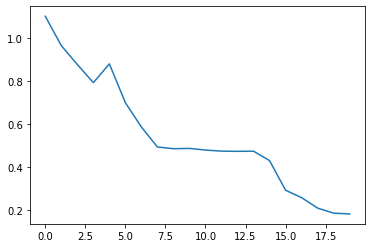

In [10]:
epoch_size = [x for x in range(epochs_num)]
plt.plot(epoch_size, cost_list)
cost_list

[0.21,
 0.245,
 0.265,
 0.235,
 0.34,
 0.45,
 0.505,
 0.53,
 0.53,
 0.53,
 0.53,
 0.53,
 0.53,
 0.53,
 0.695,
 0.795,
 0.8,
 0.815,
 0.825,
 0.825]

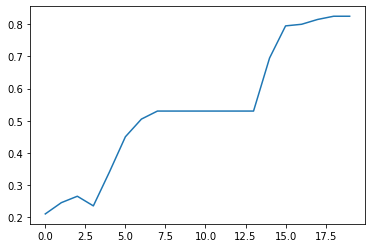

In [11]:
epoch_size = [x for x in range(epochs_num)]
plt.plot(epoch_size, accuracy_list)
accuracy_list

# Vectorization

reseting the weights and biases so the new approach could be tested

In [38]:
del W1
del W2
del W3
del b1
del b2
del b3
W1 = np.random.normal(0, 1.0, [150, 102])
W2 = np.random.normal(0, 1.0, [60, 150])
W3 = np.random.normal(0, 1.0, [4, 60])
b1 = np.zeros([150,1])
b2 = np.zeros([60,1])
b3 = np.zeros([4,1])

we used only 200 number of the dataset because the lack of speed
but with the new approach we have enough speed to use the whole dataset
now we use the whole dataset

In [39]:
def sigmoid(x) :
  return 1/(1 + np.exp(-x))

learning_rate = 1
epochs_num = 20
batch_size = 10
cost_list = []
accuracy_list = []
for epoch in range(0, epochs_num) :
  np.random.shuffle(train_set)
  batches = np.array_split(train_set, len(train_set)//batch_size)
  cost = 0
  accuracy = 0
  for batch in batches :
    W1_grad = np.zeros([150, 102])
    W2_grad = np.zeros([60, 150])
    W3_grad = np.zeros([4, 60])
    b1_grad = np.zeros([150, 1])
    b2_grad = np.zeros([60, 1])
    b3_grad = np.zeros([4, 1])
    for sample, label in batch :
      a1 = sigmoid(W1 @ sample + b1)
      a2 = sigmoid(W2 @ a1 + b2)
      a3 = sigmoid(W3 @ a2 + b3)
      cost += np.sum(np.power((a3-label),2))
      if (np.argmax(a3) == np.argmax(label)) :
        accuracy += 1

      W3_grad += (2 * (a3 - label) * (a3 * (1 - a3))) @ np.transpose(a2)   

      b3_grad += 2 * (a3 - label) * (a3 * (1 - a3))
      
      a2_grad = np.zeros([W3_grad.shape[1], 1])
      a2_grad = np.transpose(W3) @ (2 * (a3 - label) * (a3 * (1 - a3)))

      W2_grad += (a2_grad * (a2 * (1 - a2))) @ np.transpose(a1)

      b2_grad += a2_grad * (a2 * (1 - a2))
                    
      a1_grad = np.zeros([W2_grad.shape[1], 1])
      a1_grad += np.transpose(W2) @ (a2_grad * (a2 * (1 - a2)))

      W1_grad += (a1_grad * (a1 * (1 - a1))) @ np.transpose(sample)

      b1_grad += a1_grad * (a1 * (1 - a1))
        
    W3 = W3 - (learning_rate * (W3_grad / batch_size))
    W2 = W2 - (learning_rate * (W2_grad / batch_size))
    W1 = W1 - (learning_rate * (W1_grad / batch_size))
        
    b3 = b3 - (learning_rate * (b3_grad / batch_size))
    b2 = b2 - (learning_rate * (b2_grad / batch_size))
    b1 = b1 - (learning_rate * (b1_grad / batch_size))
  cost_list.append(cost / len(train_set))
  accuracy_list.append(accuracy / len(train_set))

this will take about 14 seconds for 20 epochs and whole of the train set (1962)

[2.004099953408059,
 1.9348536161675574,
 1.1721500826357676,
 1.0028251069844858,
 1.00140398548343,
 1.0007791267101362,
 1.000391305587344,
 1.000723730451932,
 0.9986556359418154,
 0.9354070468684568,
 0.7190859450769831,
 0.07089081800565276,
 0.004598875393549818,
 0.002553727524616253,
 0.0018462842625884676,
 0.0013257866352535304,
 0.0011484130771179642,
 0.000931654533580164,
 0.0008100093468801604,
 0.0006923325380746771]

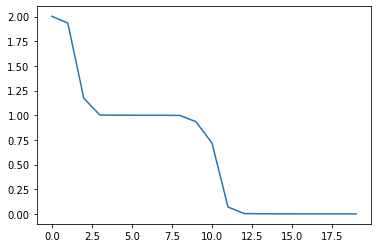

In [40]:
epoch_size = [x for x in range(epochs_num)]
plt.plot(epoch_size, cost_list)
cost_list

[0.24974515800203873,
 0.24974515800203873,
 0.24974515800203873,
 0.24974515800203873,
 0.24974515800203873,
 0.24974515800203873,
 0.24974515800203873,
 0.24974515800203873,
 0.24974515800203873,
 0.24974515800203873,
 0.29408766564729866,
 0.9734964322120285,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

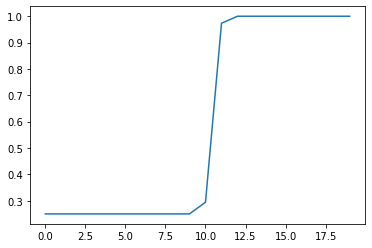

In [41]:
epoch_size = [x for x in range(epochs_num)]
plt.plot(epoch_size, accuracy_list)
accuracy_list

# Testing

In [42]:
cost = 0
accuracy = 0
for sample, label in test_set :
      a1 = sigmoid(W1 @ sample + b1)
      a2 = sigmoid(W2 @ a1 + b2)
      a3 = sigmoid(W3 @ a2 + b3)
      cost += np.sum(np.power((a3-label),2))
      if (np.argmax(a3) == np.argmax(label)) :
        accuracy += 1
print(cost / len(test_set))
print(accuracy / len(test_set))

0.002700232935005279
1.0


In [43]:
a3

array([[0.98755414],
       [0.00452394],
       [0.03010565],
       [0.00659205]])